# Import librairies

In [1]:
# Import general librairies
import pandas as pd
import numpy as np

# Import matplotlib librairies
import matplotlib.pyplot as plt

# Import SQL libraires
import pandas.io.sql as sqlio
import psycopg2 as ps

# Import statistic librairies
from statistics import median
from statistics import mode

# Import statistics tests librairies
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import librairie to plot and quantify distributions
import seaborn as sns
from collections import Counter
sns.set()

# Connect to database

In [2]:
conn = ps.connect(dbname="SLA", user="postgres", password="root", host="localhost", port="5432")

# Get data from database

In [3]:
sql = 'SELECT * FROM "PATIENTS"'
df_SLA = sqlio.read_sql_query(sql, conn)

C:\Users\guill\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


# Patients Workflow

## Get just patients data

In [4]:
df_patients = df_SLA.copy()
print("Nombre de patients restant :", df_patients.shape[0])

Nombre de patients restant : 1045


# Drop "Respiratoire" Diagnostic

In [5]:
df_patients = df_patients[df_patients.GROUPEDEB != "Respiratoire"]
print("Nombre de patients restant :", df_patients.shape[0])

Nombre de patients restant : 1018


# Describe data

In [6]:
df_patients.describe()

,ID,AGE_DEBUT,EVOSYMPTOM,WEIGHT_REF,WEIGHT_1,WEIGHT_2,WEIGHT_3,WEIGHT_4,WEIGHT_5,WEIGHT_6,...,DATE_PREVENT_DELAY_23,DATE_PREVENT_DELAY_24,DATE_PREVENT_DELAY_25,DATE_PREVENT_DELAY_26,DATE_PREVENT_DELAY_27,DATE_PREVENT_DELAY_28,DATE_PREVENT_DELAY_29,DATE_PREVENT_DELAY_30,DATE_PREVENT_DELAY_31,DATE_PREVENT_DELAY_32
count,1018.000000,1007.000000,623.000000,891.000000,928.000000,728.000000,640.000000,546.000000,456.000000,378.000000,...,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,839.644401,65.361470,34.439807,72.177329,67.767241,67.949176,67.568750,66.862637,66.828947,66.285714,...,90.250000,94.250000,100.500000,104.000000,107.500000,111.000000,114.500000,118.000000,120.000000,125.000000
std,484.389254,11.590273,25.231134,15.062491,14.592255,14.836529,14.947219,14.551944,15.075244,14.954497,...,7.088723,6.751543,9.192388,9.899495,10.606602,11.313708,12.020815,12.727922,9.899495,8.485281
min,1.000000,27.000000,3.000000,42.000000,30.000000,30.000000,30.000000,35.000000,34.000000,34.000000,...,84.000000,88.000000,94.000000,97.000000,100.000000,103.000000,106.000000,109.000000,113.000000,119.000000
25%,432.250000,58.000000,18.000000,62.000000,58.000000,58.000000,58.000000,57.250000,57.000000,57.000000,...,84.750000,89.500000,97.250000,100.500000,103.750000,107.000000,110.250000,113.500000,116.500000,122.000000
50%,804.500000,67.000000,27.000000,71.000000,67.000000,66.000000,66.000000,66.000000,65.000000,65.500000,...,89.000000,93.000000,100.500000,104.000000,107.500000,111.000000,114.500000,118.000000,120.000000,125.000000
75%,1268.750000,74.000000,43.000000,80.000000,76.000000,77.000000,76.000000,76.000000,76.000000,75.000000,...,94.500000,97.750000,103.750000,107.500000,111.250000,115.000000,118.750000,122.500000,123.500000,128.000000
max,1660.000000,96.000000,184.000000,147.000000,140.000000,131.000000,141.000000,130.000000,133.000000,129.000000,...,99.000000,103.000000,107.000000,111.000000,115.000000,119.000000,123.000000,127.000000,127.000000,131.000000


## Plot patients variables distributions

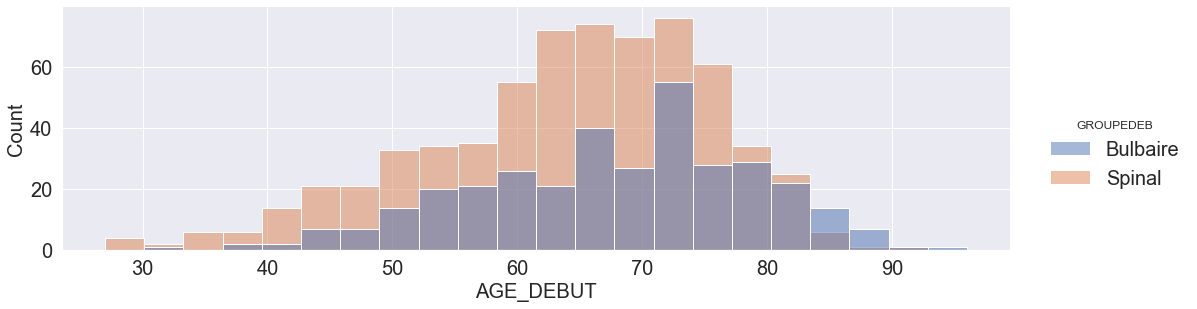

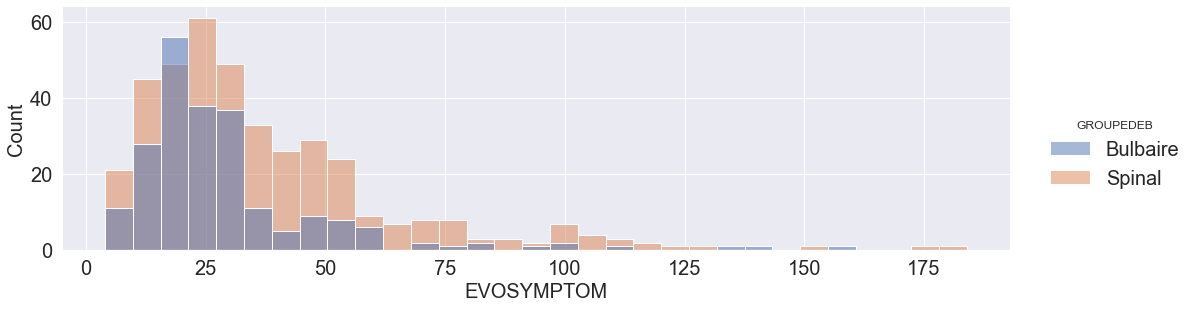

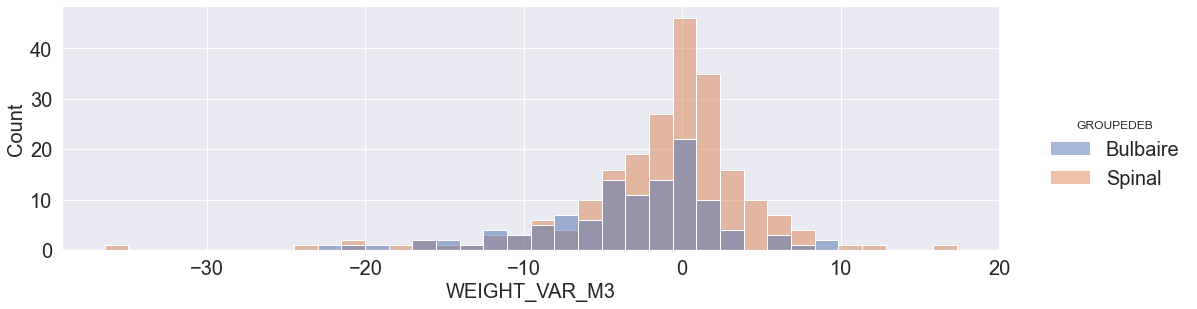

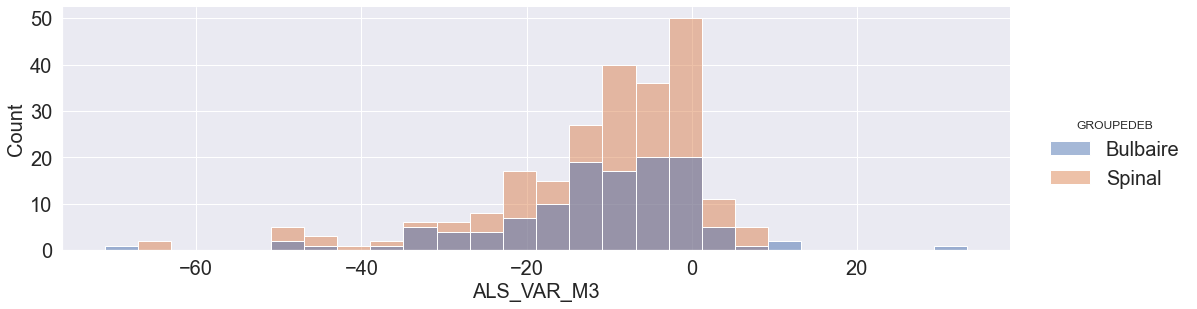

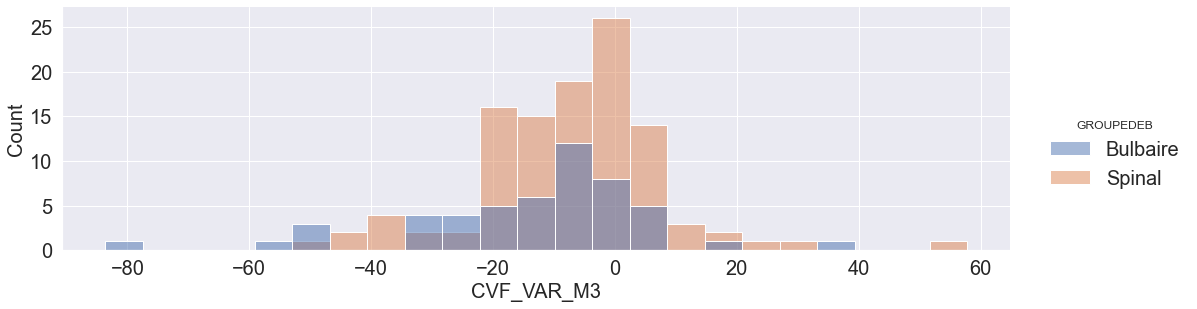

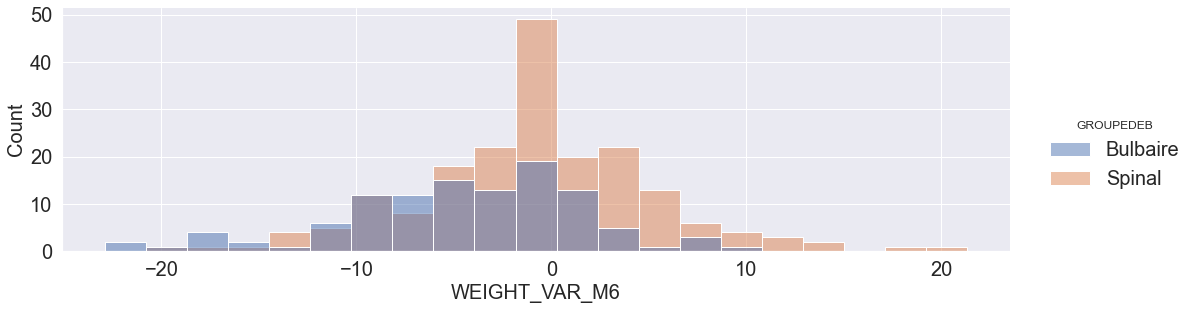

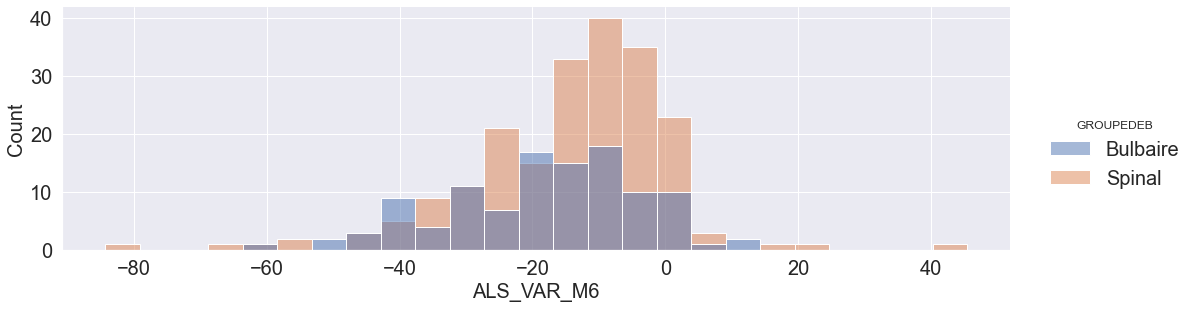

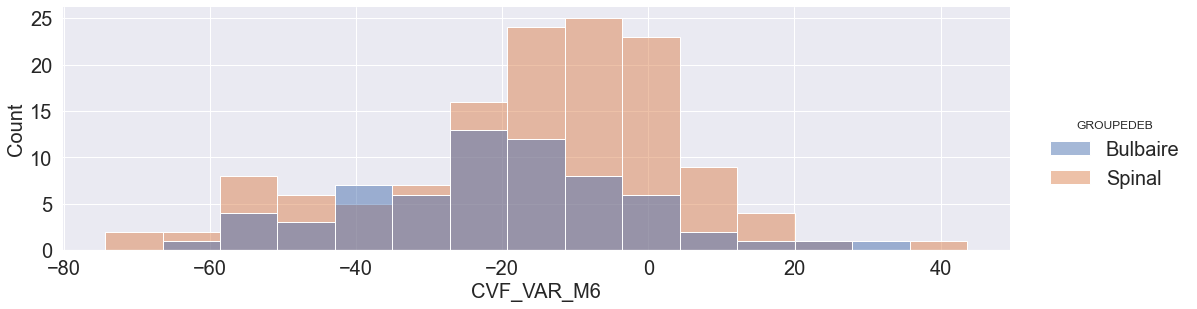

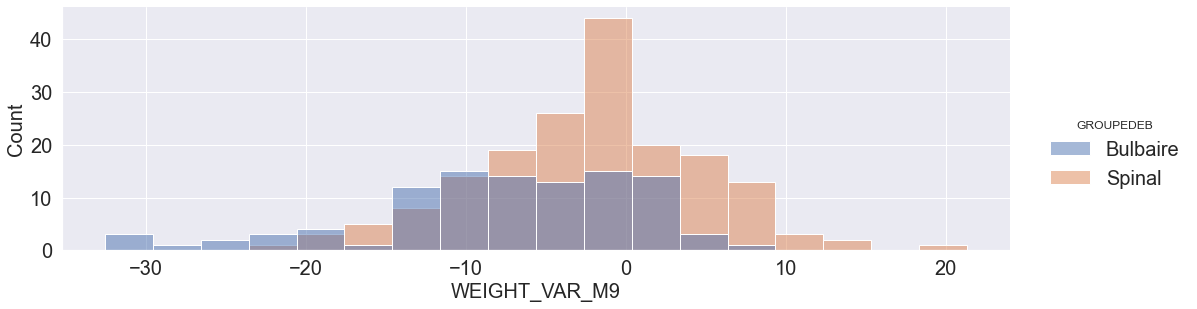

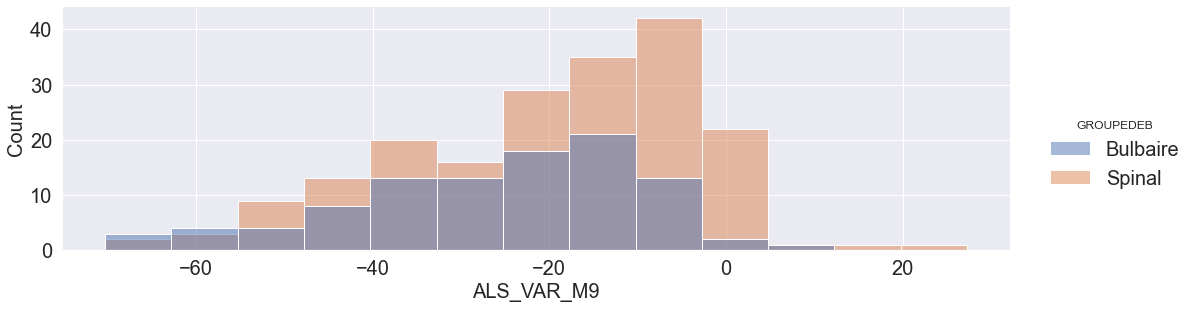

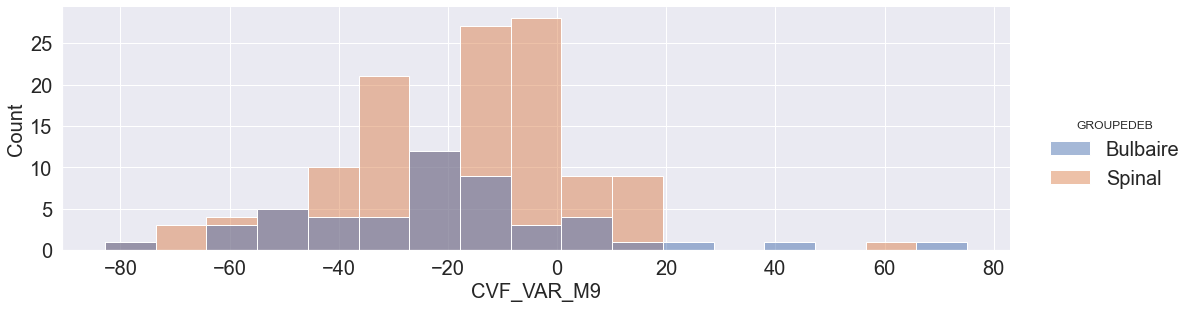

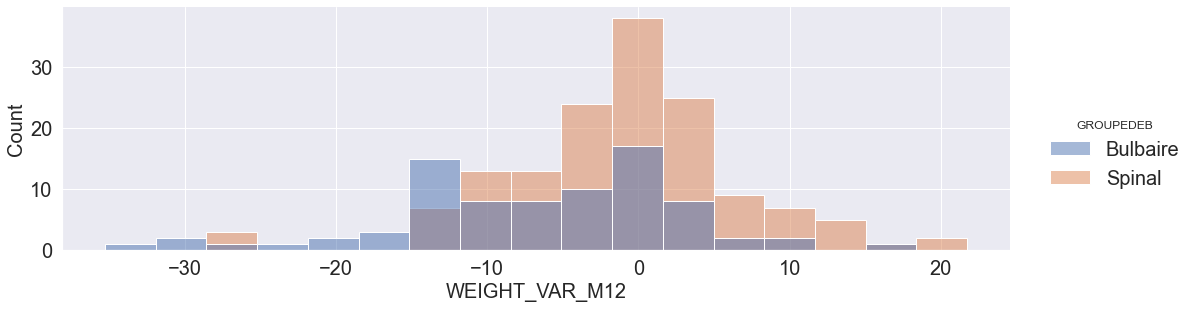

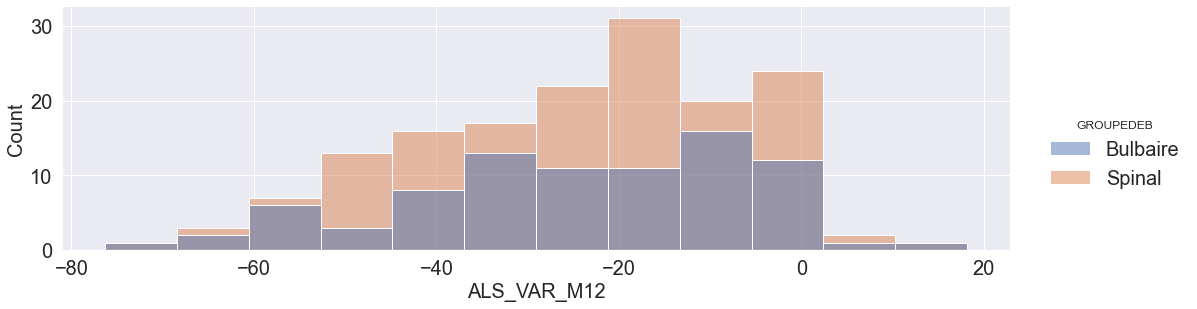

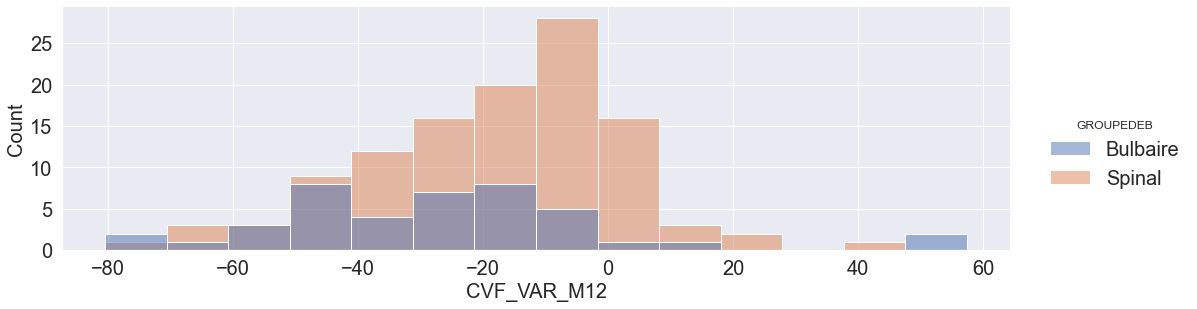

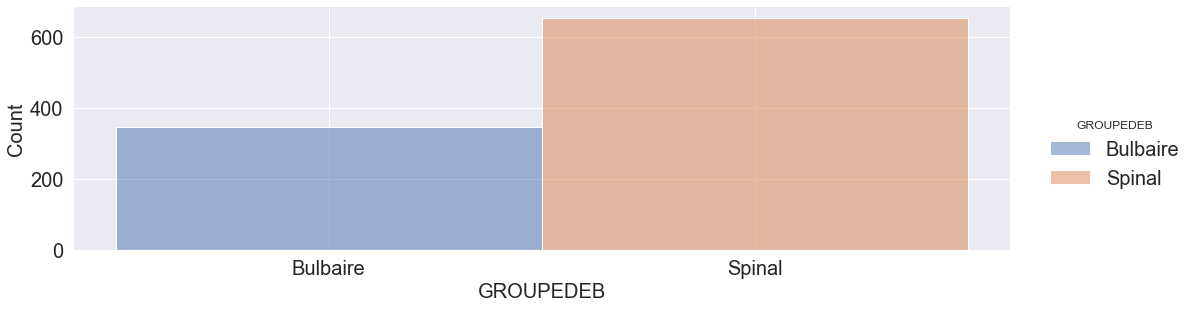

,mean,std,median,mode,sample_size,Bulbaire_sample_size,Bulbaire_mean,Bulbaire_std,Spinal_sample_size,Spinal_mean,Spinal_std
AGE_DEBUT,65.0,12.0,67.000,75.0,1007,345,68.0,11.0,651,64.0,11.0
EVOSYMPTOM,34.0,25.0,27.000,17.0,623,221,30.0,22.0,398,37.0,26.0
WEIGHT_VAR_M3,-2.0,6.0,-1.165,0.0,332,114,-3.0,6.0,218,-1.0,6.0
ALS_VAR_M3,-11.0,13.0,-8.220,0.0,356,120,-11.0,13.0,234,-11.0,13.0
CVF_VAR_M3,-9.0,17.0,-7.910,0.0,162,51,-13.0,19.0,109,-7.0,15.0
WEIGHT_VAR_M6,-2.0,6.0,-1.390,0.0,304,110,-4.0,6.0,193,-1.0,6.0
ALS_VAR_M6,-15.0,15.0,-13.040,0.0,317,110,-18.0,15.0,206,-14.0,15.0
CVF_VAR_M6,-17.0,20.0,-14.210,-8.0,200,65,-20.0,19.0,133,-16.0,21.0
WEIGHT_VAR_M9,-4.0,8.0,-2.820,0.0,278,101,-7.0,9.0,177,-2.0,7.0
ALS_VAR_M9,-22.0,17.0,-19.050,-5.0,296,100,-26.0,16.0,194,-20.0,17.0


In [7]:
# Set hue variable
hue_var = 'GROUPEDEB'

# Set unique values from hue variable
unique_values = (pd.unique(df_patients[hue_var].dropna()))

# Set patient variables
variables = ['AGE_DEBUT', 'EVOSYMPTOM',
             'WEIGHT_VAR_M3', 'ALS_VAR_M3', 'CVF_VAR_M3',
             'WEIGHT_VAR_M6', 'ALS_VAR_M6', 'CVF_VAR_M6',
             'WEIGHT_VAR_M9', 'ALS_VAR_M9', 'CVF_VAR_M9',
             'WEIGHT_VAR_M12', 'ALS_VAR_M12', 'CVF_VAR_M12', 'GROUPEDEB']

# Create dataframe that will contains statistic values about variables
df_stat_var = pd.DataFrame(columns=['mean', 'std', 'median', 'mode', 'sample_size'], index=variables)

# Create list of dictionaries
list_dict = []

# For each variable
for variable in variables:
    
    # Plot histogram
    plt.rc('font', size=30) #controls default text size
    plt.rc('axes', titlesize=20) #fontsize of the title
    plt.rc('axes', labelsize=20) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
    plt.rc('legend', fontsize=20) #fontsize of the legend
    sns.displot(data=df_patients, x=df_patients[variable], hue=hue_var, aspect=3)
    plt.show()
    
    # Drop na values from the current variables
    var_no_null = df_patients[variable].dropna()
    var_no_null = var_no_null.reset_index(drop=True)
    
    # Sample size
    sample_size = var_no_null.shape[0]
  
    if type(var_no_null[0]) is np.float64:
        # Mean
        mean = round(np.mean(var_no_null))
        # Standard deviation
        std = round(np.std(var_no_null))
        # Median
        median_ = median(var_no_null)
        # Mode
        mode_ = mode(round(var_no_null))
        # Add dictionary into the list
        dict_stat_var = {'mean':mean, 'std':std, 'median':median_, 'mode':mode_, 'sample_size':sample_size}
        for v in unique_values:
            df_tmp = df_patients[np.union1d(hue_var, variable)].dropna()
            df_tmp = df_tmp[df_tmp[hue_var] == v]
            # Sample size
            dict_stat_var[v + "_sample_size"] = df_tmp.shape[0]
            # Mean
            dict_stat_var[v + "_mean"] = round(np.mean(df_tmp[variable]))
            # Standard deviation
            dict_stat_var[v + "_std"] = round(np.std(df_tmp[variable]))
        list_dict.append(dict_stat_var)
    else:
        # Add dictionary into the list
        dict_stat_var = {'sample_size':sample_size}
        for v in unique_values:
            df_tmp = df_patients[np.union1d(hue_var, variable)].dropna()
            dict_stat_var[v + "_sample_size"] = df_tmp[df_tmp[hue_var] == v].shape[0]
        list_dict.append(dict_stat_var)

# Print Dataframe
df_stat_var = pd.DataFrame(list_dict, index=[variables])
df_stat_var

## Plot Spearman correlation

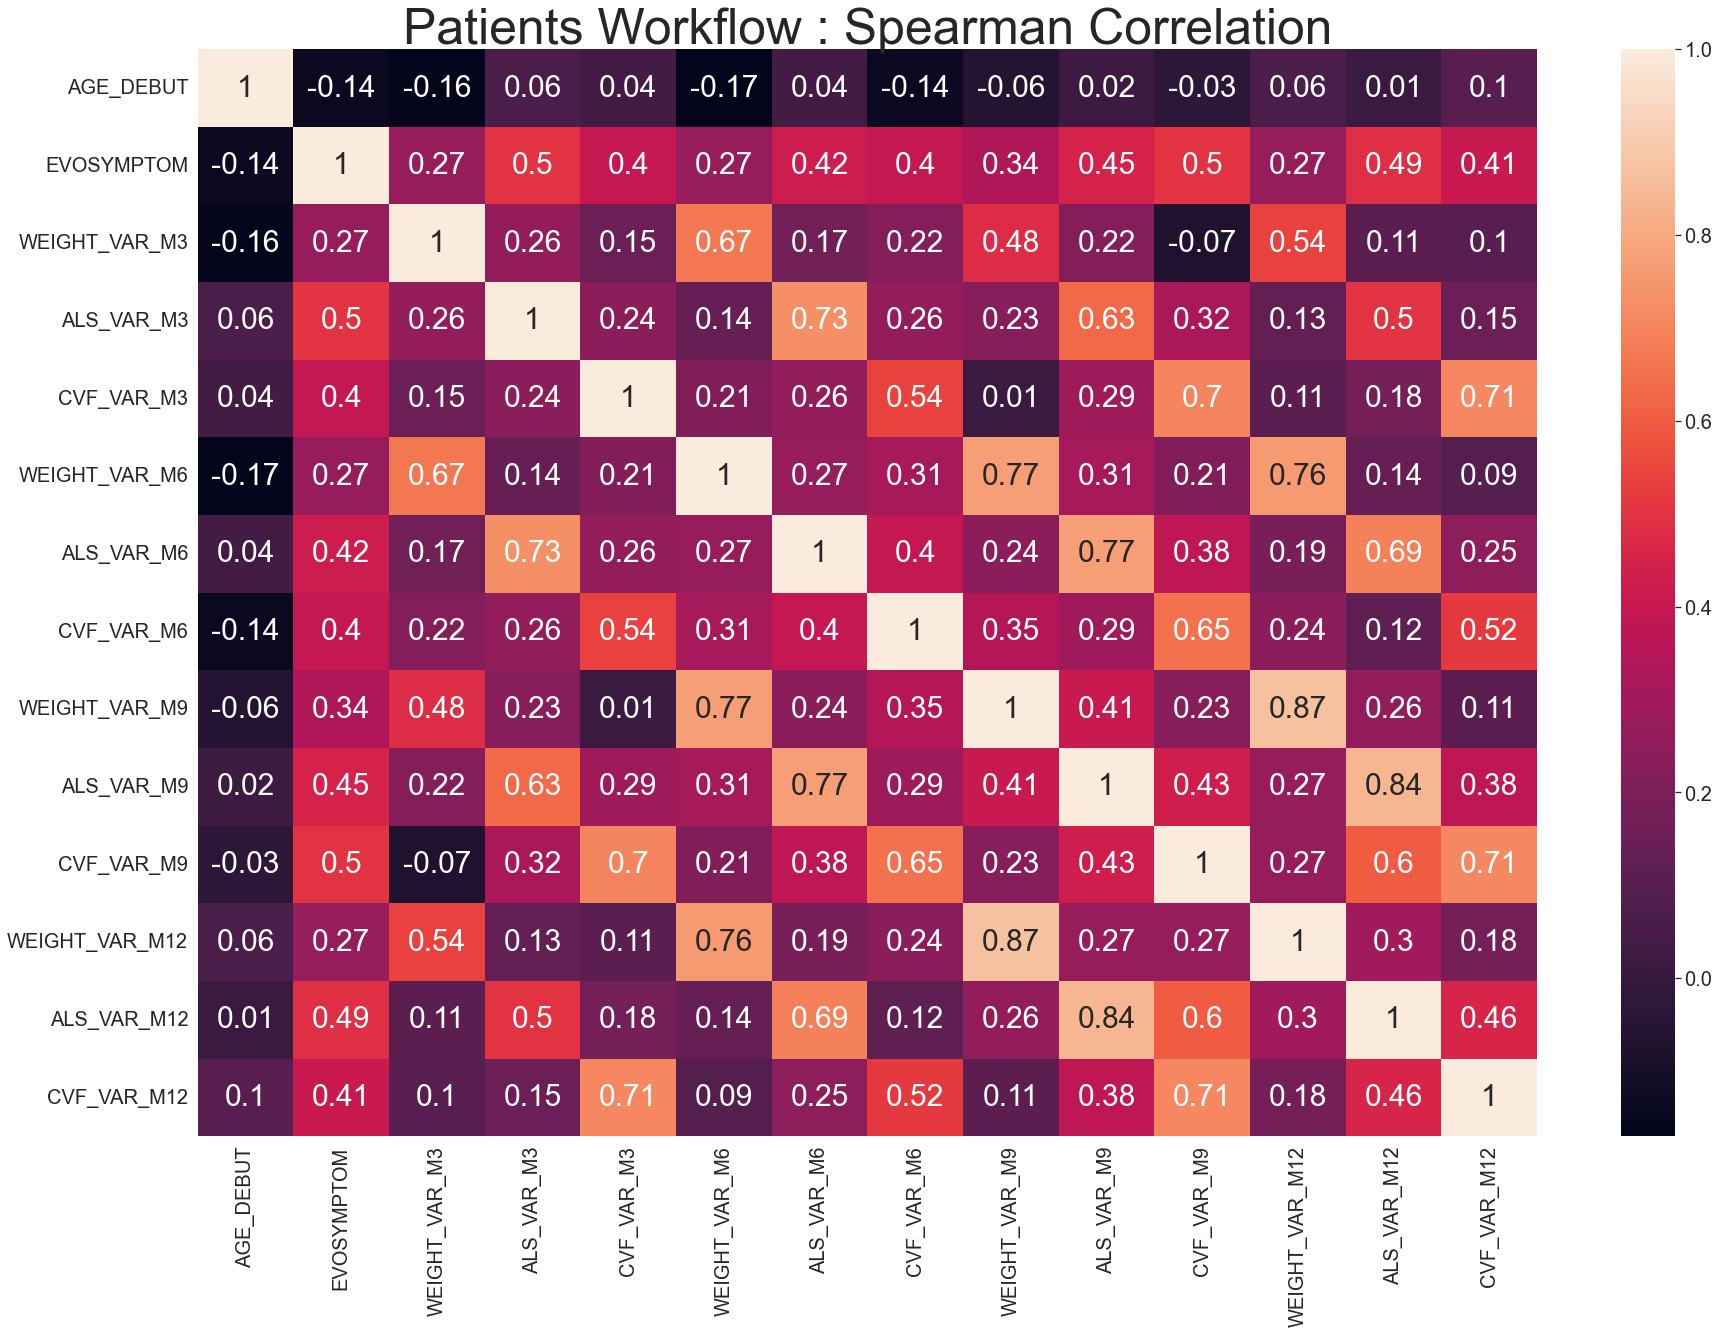

In [8]:
# Variables to assess
variables = ['AGE_DEBUT', 'EVOSYMPTOM',
             'WEIGHT_VAR_M3', 'ALS_VAR_M3', 'CVF_VAR_M3',
             'WEIGHT_VAR_M6', 'ALS_VAR_M6', 'CVF_VAR_M6',
             'WEIGHT_VAR_M9', 'ALS_VAR_M9', 'CVF_VAR_M9',
             'WEIGHT_VAR_M12', 'ALS_VAR_M12', 'CVF_VAR_M12', 'GROUPEDEB']

# Get temporary dataframe
df_tmp = df_patients[variables]

# Plot Spearman correlation
corr = df_tmp.corr(method="spearman").round(2)
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot=True)
plt.title("Patients Workflow : Spearman Correlation", fontsize=50)
plt.show()

## Normality Test with Shapiro

In [9]:
numericals = [
             'WEIGHT_VAR_M3', 'ALS_VAR_M3', 'CVF_VAR_M3',
             'WEIGHT_VAR_M6', 'ALS_VAR_M6', 'CVF_VAR_M6',
             'WEIGHT_VAR_M9', 'ALS_VAR_M9', 'CVF_VAR_M9',
             'WEIGHT_VAR_M12', 'ALS_VAR_M12', 'CVF_VAR_M12']

df_shapiro_pvalue = pd.DataFrame(columns=["p-value"])

# For each variable to assess
for numerical in numericals:
    # Get numerical variable
    df_tmp = df_patients[numerical].copy()
    # Remove null values
    df_tmp = df_tmp.dropna()
    # Get results from Shapiro test
    shapiro_result = stats.shapiro(df_tmp)
    # Get corresponding p-value
    df_shapiro_pvalue.loc[numerical] = shapiro_result[0]

### Plot p-values results

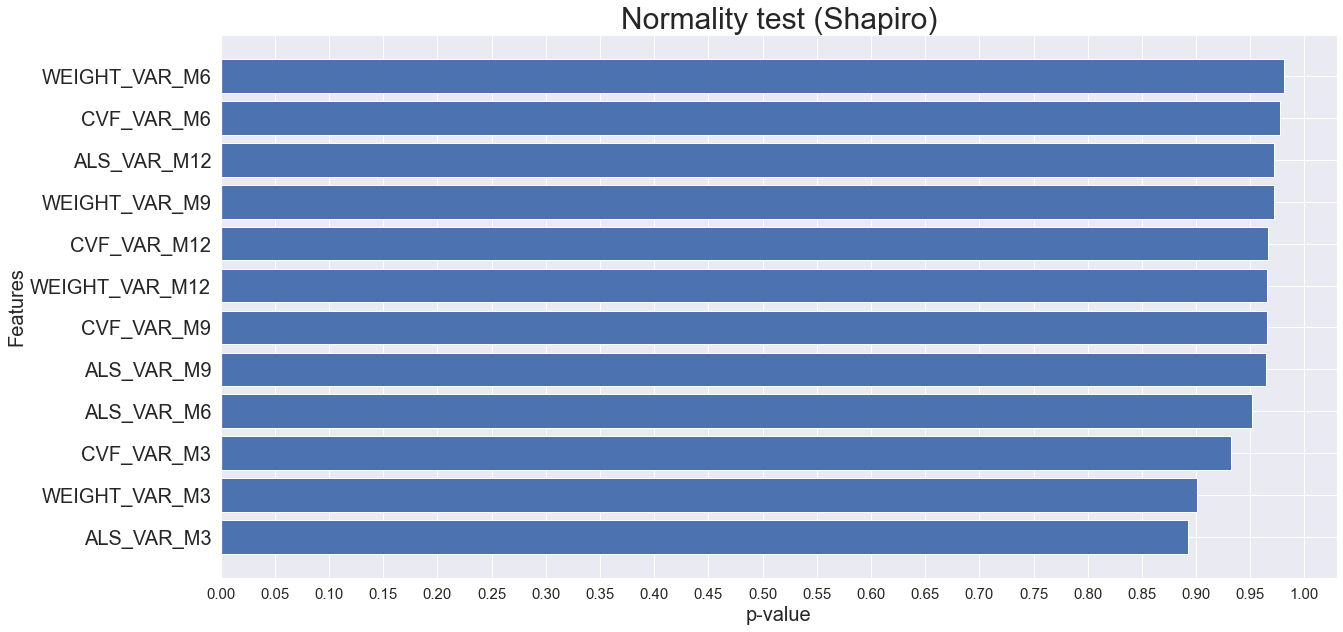

In [10]:
# Create figure
fig = plt.figure(figsize=(20,10))

# Get p-values
values = df_shapiro_pvalue["p-value"]

# Sort p-values
values = values.sort_values()

# Get keys from each p-value
keys = values.keys()

# Get key variable from each p-values
plt.barh(keys, values)

# Add title
plt.title("Normality test (Shapiro)", fontsize=30)

# Alter scale for x axis
plt.locator_params('x', nbins=25)

# Alter fontsize for x axis labels
plt.xticks(fontsize=15)

# Add label for x axis
plt.xlabel("p-value", fontsize=20)

# Add label for y axis
plt.ylabel("Features", fontsize=20)

plt.show()

## Test for the equivalence of two population variances with F-test

In [11]:
# Define F-Test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p_left = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic
    p_right = 1 - p_left
    p = 2 * min(p_left, p_right)
    return f, p

nominal = 'GROUPEDEB'

numericals = [
             'WEIGHT_VAR_M3', 'ALS_VAR_M3', 'CVF_VAR_M3',
             'WEIGHT_VAR_M6', 'ALS_VAR_M6', 'CVF_VAR_M6',
             'WEIGHT_VAR_M9', 'ALS_VAR_M9', 'CVF_VAR_M9',
             'WEIGHT_VAR_M12', 'ALS_VAR_M12', 'CVF_VAR_M12']

df_Ftest_pvalue = pd.DataFrame(columns=["p-value"])

for numerical in numericals:    
    df_tmp = df_patients[np.union1d(numerical, nominal)].copy()
    df_tmp = df_tmp.dropna()

    cat_unique_values = pd.unique(df_tmp[nominal])
    groups = []
    for cat_unique_value in cat_unique_values:
        group = list(df_tmp[df_tmp[nominal] == cat_unique_value][numerical])
        groups.append(group)

    result = f_test(groups[0], groups[1])
    df_Ftest_pvalue.loc[numerical] = result[1]

### Plot p-values results

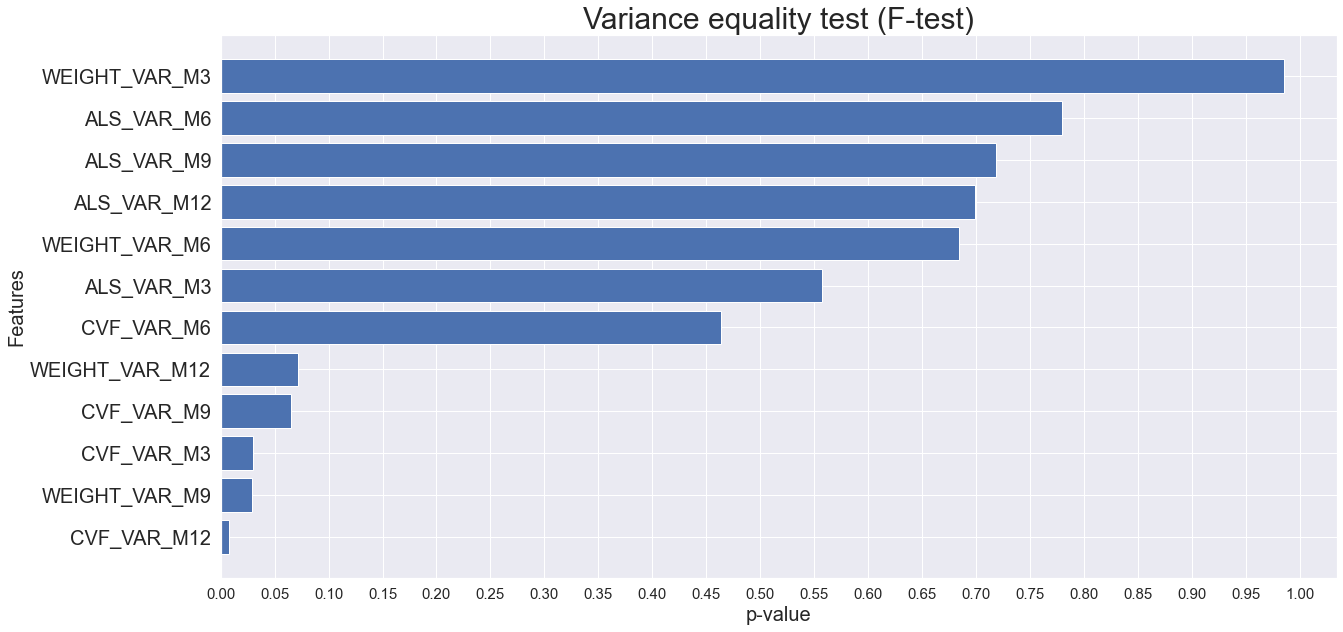

In [12]:
# Create figure
fig = plt.figure(figsize=(20,10))

# Get p-values
values = df_Ftest_pvalue["p-value"]

# Sort p-values
values = values.sort_values()

# Get keys from each p-value
keys = values.keys()

# Get key variable from each p-values
plt.barh(keys, values)

# Add title
plt.title("Variance equality test (F-test)", fontsize=30)

# Alter scale for x axis
plt.locator_params('x', nbins=25)
# Alter fontsize for x axis labels
plt.xticks(fontsize=15)
# Add label for x axis
plt.xlabel("p-value", fontsize=20)

# Add label for y axis
plt.ylabel("Features", fontsize=20)

plt.show()

## Test for the equivalence of two population means with Student's T-test

In [13]:
nominal = 'GROUPEDEB'

numericals = [  'WEIGHT_VAR_M3', 'ALS_VAR_M6', 'WEIGHT_VAR_M6', 
'ALS_VAR_M12', 'ALS_VAR_M9', 'ALS_VAR_M3', 
'CVF_VAR_M6']

df_Ttest_pvalue = pd.DataFrame(columns=["p-value"])

for numerical in numericals:    
    df_tmp = df_patients[np.union1d(numerical, nominal)].copy()
    df_tmp = df_tmp.dropna()

    cat_unique_values = pd.unique(df_tmp[nominal])
    groups = []
    for cat_unique_value in cat_unique_values:
        group = list(df_tmp[df_tmp[nominal] == cat_unique_value][numerical])
        groups.append(group)

    result = stats.ttest_ind(groups[0], groups[1])
    df_Ttest_pvalue.loc[numerical] = result[1]

### Plot p-values results

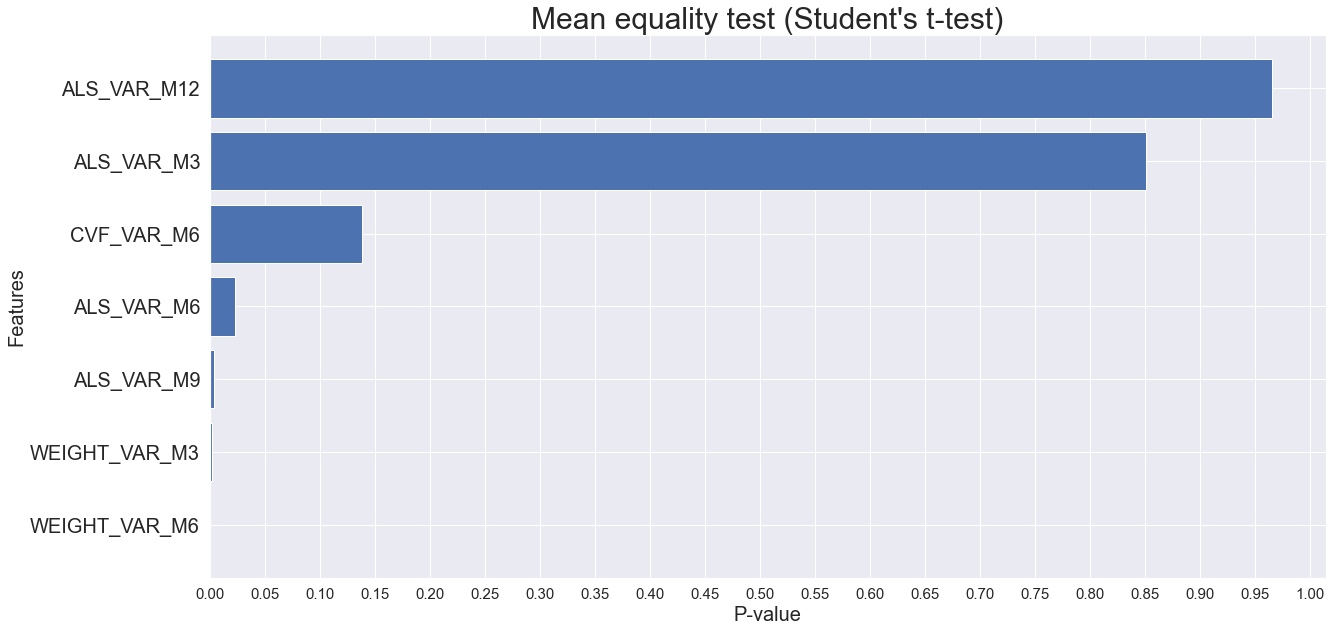

In [14]:
# Create figure
fig = plt.figure(figsize=(20,10))

# Get p-values
values = df_Ttest_pvalue["p-value"]

# Sort p-values
values = values.sort_values()

# Get keys from each p-value
keys = values.keys()

# Get key variable from each p-values
plt.barh(keys, values)

# Add title
plt.title("Mean equality test (Student's t-test)", fontsize=30)

# Alter scale for x axis
plt.locator_params('x', nbins=25)
# Alter fontsize for x axis labels
plt.xticks(fontsize=15)
# Add label for x axis
plt.xlabel("P-value", fontsize=20)

# Add label for y axis
plt.ylabel("Features", fontsize=20)

plt.show()

## Test for the equivalence of two population means with Welch T-Test

In [15]:
nominal = 'GROUPEDEB'

numericals = ['WEIGHT_VAR_M12', 'CVF_VAR_M9', 'CVF_VAR_M3', 'WEIGHT_VAR_M9', 'CVF_VAR_M12']

df_Wtest_pvalue = pd.DataFrame(columns=["p-value"])

for numerical in numericals:    
    df_tmp = df_patients[np.union1d(numerical, nominal)].copy()
    df_tmp = df_tmp.dropna()

    cat_unique_values = pd.unique(df_tmp[nominal])
    groups = []
    for cat_unique_value in cat_unique_values:
        group = list(df_tmp[df_tmp[nominal] == cat_unique_value][numerical])
        groups.append(group)

    result = stats.ttest_ind(groups[0], groups[1], equal_var=False)
    df_Wtest_pvalue.loc[numerical] = result[1]

### Plot p-values results

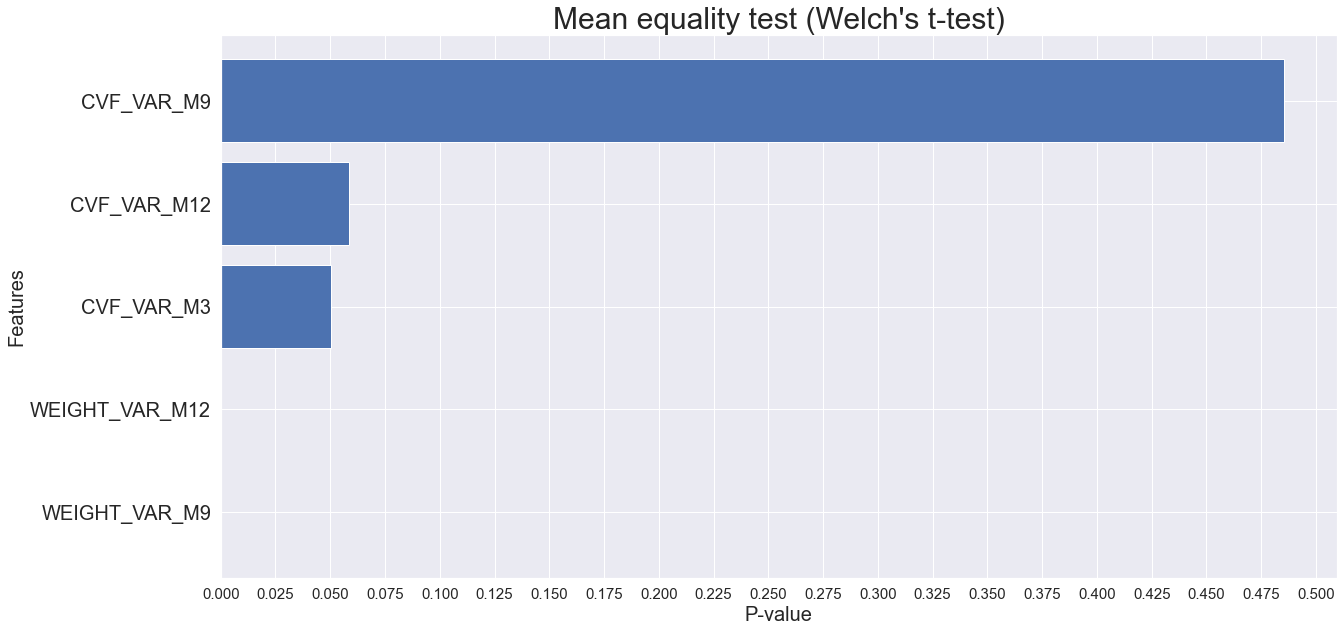

In [16]:
# Create figure
fig = plt.figure(figsize=(20,10))

# Get p-values
values = df_Wtest_pvalue["p-value"]

# Sort p-values
values = values.sort_values()

# Get keys from each p-value
keys = values.keys()

# Get key variable from each p-values
plt.barh(keys, values)

# Add title
plt.title("Mean equality test (Welch's t-test)", fontsize=30)

# Alter scale for x axis
plt.locator_params('x', nbins=25)
# Alter fontsize for x axis labels
plt.xticks(fontsize=15)
# Add label for x axis
plt.xlabel("P-value", fontsize=20)

# Add label for y axis
plt.ylabel("Features", fontsize=20)

plt.show()

## Plot available rows based on features

Number of available rows : [332, 317, 110, 56, 55, 45, 23, 23, 16, 10, 10, 5]


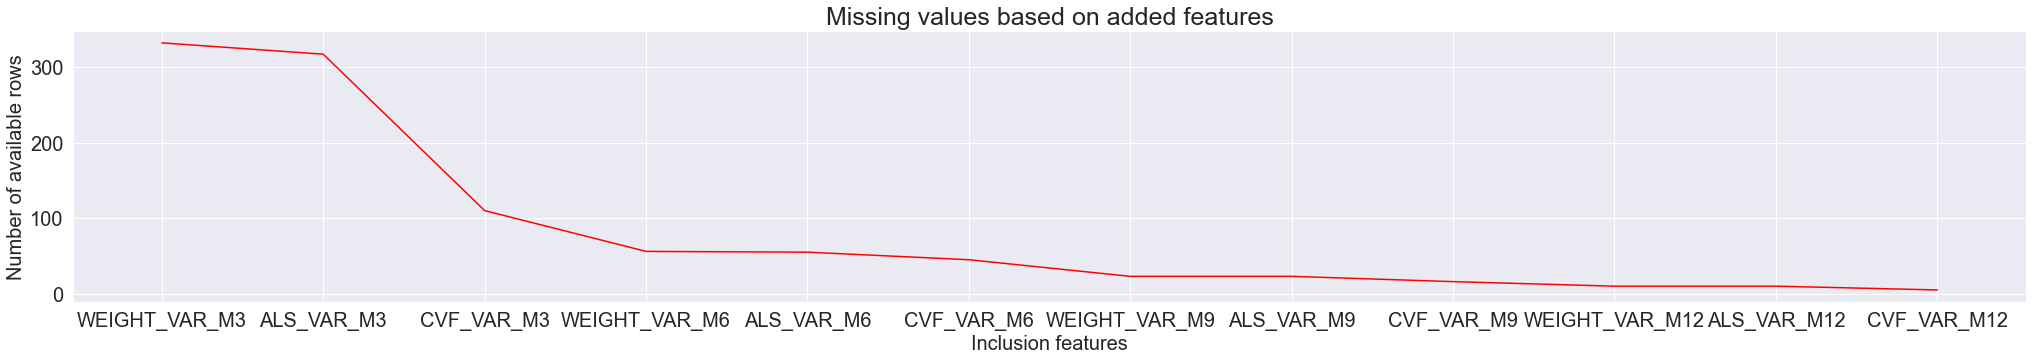

In [17]:
# Variables to evaluate
variables = [['WEIGHT_VAR_M3'], ['ALS_VAR_M3'], ['CVF_VAR_M3'],
             ['WEIGHT_VAR_M6'], ['ALS_VAR_M6'], ['CVF_VAR_M6'],
             ['WEIGHT_VAR_M9'], ['ALS_VAR_M9'], ['CVF_VAR_M9'],
             ['WEIGHT_VAR_M12'], ['ALS_VAR_M12'], ['CVF_VAR_M12']]

# Pile of features added one by one
start_variables = []

# Number of rows stored when a new variable is added
nb_row_list = []

# For each variables to add
for variables_set in variables:
     
    start_variables.append(variables_set)
    
    ar = np.array(start_variables).flatten()
   
    df_tmp = df_patients[ar].copy()
    df_tmp = df_tmp.dropna()
    nb_row = df_tmp.shape[0]
    nb_row_list.append(nb_row)
    
print('Number of available rows :', nb_row_list)

fig, (ax1) = plt.subplots(1, 1, figsize=(35, 5))

ax1.plot(np.array(variables).flatten(), nb_row_list, color="red")
ax1.set_xlabel("Inclusion features", fontsize=20)
ax1.set_ylabel("Number of available rows", fontsize=20)
ax1.set_title('Missing values based on added features', fontsize=25)

plt.show()